In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/yenalee/Desktop/workplace/AI_2025-1/week7/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


| 영어 컬럼명 | 한글 컬럼명 |
|:------------------------------|:----------------------|
| Patient_Number | 환자번호 |
| Blood_Pressure_Abnormality | 혈압이상 |
| Level_of_Hemoglobin | 헤모글로빈 수치 |
| Genetic_Pedigree_Coefficient | 가족력 |
| Age | 나이 |
| BMI | 체질량지수 BMI |
| Sex | 성별 |
| Pregnancy | 임신여부 |
| Smoking | 흡연여부 |
| Physical_activity | 신체활동 |
| salt_content_in_the_diet | 식단 내 염분 함량 |
| alcohol_consumption_per_day | 하루 알코올 섭취량 |
| Level_of_Stress | 스트레스 수준 |
| Chronic_kidney_disease | 만성 신장 질환 |
| Adrenal_and_thyroid_disorders | 부신 및 갑상선 질환 |

In [4]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [5]:
print(df.isna().sum())  # 각 열별 NaN 개수 출력

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [6]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(
    df['Genetic_Pedigree_Coefficient'].mean()
)

df['Pregnancy'] = df['Pregnancy'].fillna(0)
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(0)

In [7]:
df = df.drop('Patient_Number', axis=1)

In [8]:
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


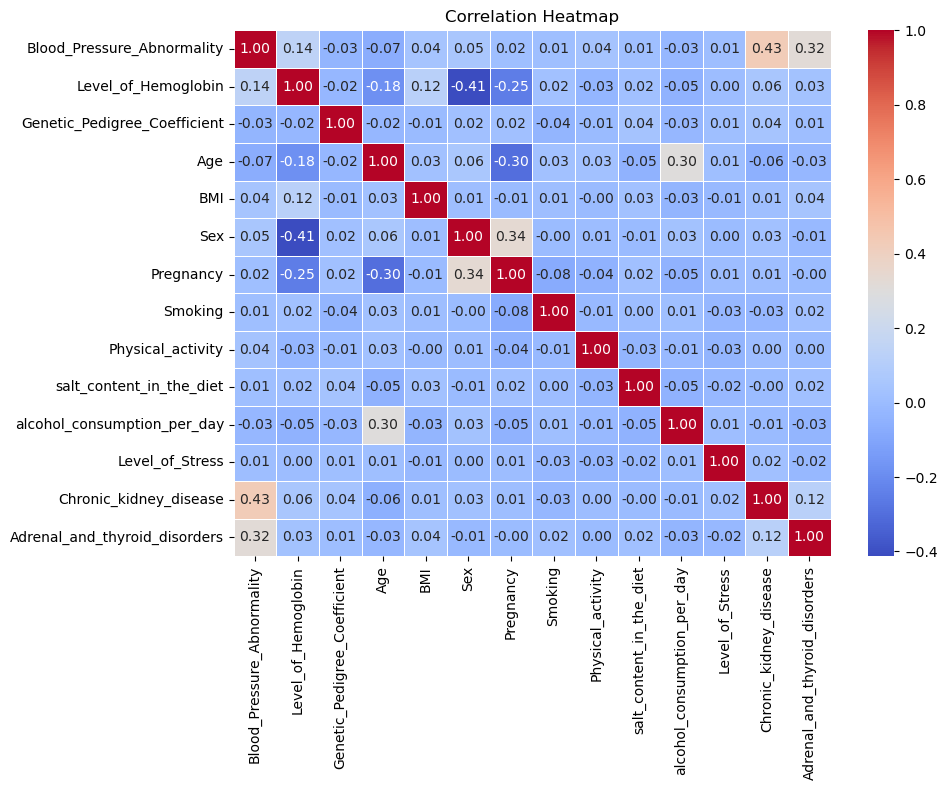

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터의 상관 관계 행렬 구하기
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)

# 제목 및 레이블 설정
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

---

In [11]:
# 데이터와 타겟 분리
x = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values

In [12]:
x

array([[11.28,  0.9 , 34.  , ...,  2.  ,  1.  ,  1.  ],
       [ 9.75,  0.23, 54.  , ...,  3.  ,  0.  ,  0.  ],
       [10.79,  0.91, 70.  , ...,  2.  ,  1.  ,  0.  ],
       ...,
       [16.91,  0.22, 18.  , ...,  2.  ,  1.  ,  1.  ],
       [11.15,  0.72, 46.  , ...,  3.  ,  0.  ,  1.  ],
       [11.36,  0.09, 41.  , ...,  1.  ,  1.  ,  0.  ]])

In [13]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [14]:
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight

# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [19]:
# Create DataLoader
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

In [21]:
class BPDense(nn.Module):
    def __init__(self):
        super(BPDense, self).__init__()
        self.fc1 = nn.Linear(13,64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 classes in the dataset

        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BPDense()

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [23]:
train_losses = []
test_accuracies = []

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for X_batch, y_batch in train_dataloader:

        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    # 평균 손실 저장
    avg_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_loss)

    # 평가 모드 전환
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_dataloader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/30, Loss: 0.6953, Accuracy: 55.75%
Epoch 2/30, Loss: 0.6730, Accuracy: 70.50%
Epoch 3/30, Loss: 0.6429, Accuracy: 73.75%
Epoch 4/30, Loss: 0.6165, Accuracy: 75.00%
Epoch 5/30, Loss: 0.5762, Accuracy: 75.25%
Epoch 6/30, Loss: 0.5544, Accuracy: 74.00%
Epoch 7/30, Loss: 0.5315, Accuracy: 75.75%
Epoch 8/30, Loss: 0.5192, Accuracy: 76.50%
Epoch 9/30, Loss: 0.5297, Accuracy: 76.00%
Epoch 10/30, Loss: 0.5218, Accuracy: 76.50%
Epoch 11/30, Loss: 0.5222, Accuracy: 77.75%
Epoch 12/30, Loss: 0.4977, Accuracy: 79.75%
Epoch 13/30, Loss: 0.4762, Accuracy: 79.25%
Epoch 14/30, Loss: 0.4625, Accuracy: 79.25%
Epoch 15/30, Loss: 0.4546, Accuracy: 80.25%
Epoch 16/30, Loss: 0.4468, Accuracy: 80.50%
Epoch 17/30, Loss: 0.4466, Accuracy: 80.75%
Epoch 18/30, Loss: 0.4281, Accuracy: 82.50%
Epoch 19/30, Loss: 0.4130, Accuracy: 84.25%
Epoch 20/30, Loss: 0.4079, Accuracy: 84.75%
Epoch 21/30, Loss: 0.3819, Accuracy: 86.00%
Epoch 22/30, Loss: 0.3790, Accuracy: 87.75%
Epoch 23/30, Loss: 0.3735, Accuracy: 88.0

In [24]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[181  27]
 [ 15 177]]
F1 Score: 0.90
Precision: 0.90
Recall: 0.90
Specificity: 0.90


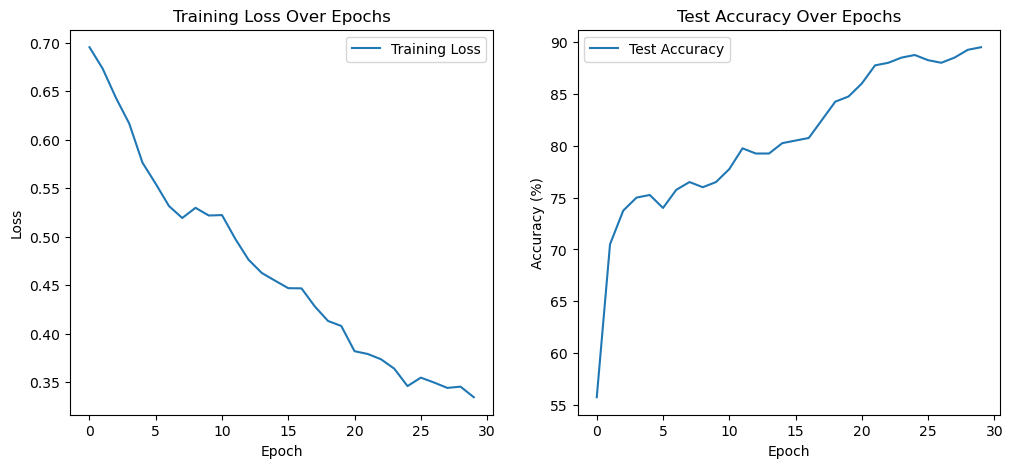

In [25]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()